In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('amenities.csv', na_values = 'NaN', encoding = 'latin-1')

In [3]:
X = df.drop('price', axis=1)
y = df['price']

In [4]:
dtree = DecisionTreeClassifier()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [13]:
X_train.shape, y_train.shape

((743, 128), (743,))

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
dtree.score(X_test,y_test)


0.6491935483870968

In [11]:
display(df)

,price,Bathtub,Electric stove,Microwave,Courtyard view,Laundromat nearby,Kitchen,Refrigerator,Central air conditioning,Smoke alarm,...,Gym,Outlet covers,Paid washer  In building,Shared patio or balcony,Paid parking garage off premises,Sound system,Rice maker,Breakfast,Paid parking off premises,Shared gym in building
0,10,0,0,1,0,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
1,15,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,19,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1964,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
987,1989,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
988,1995,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
989,1997,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
y_pred = dtree.predict(X_test)

In [31]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6129032258064516


In [44]:
df.columns

Index(['price', 'Bathtub', 'Electric stove', 'Microwave', 'Courtyard view',
       'Laundromat nearby', 'Kitchen', 'Refrigerator',
       'Central air conditioning', 'Smoke alarm',
       ...
       'Gym', 'Outlet covers', 'Paid washer  In building',
       'Shared patio or balcony', 'Paid parking garage off premises',
       'Sound system', 'Rice maker', 'Breakfast', 'Paid parking off premises',
       'Shared gym in building'],
      dtype='object', length=129)

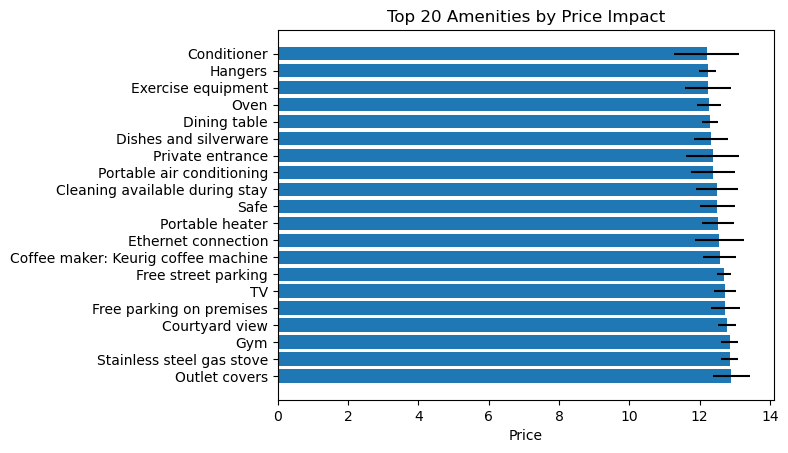

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
amenities = df.columns
y_pos = np.arange(len(amenities))
price = 3 + 10 * np.random.rand(len(amenities))
error = np.random.rand(len(amenities))

sorted_indices = np.argsort(price)
top_n = 20

top_price = price[sorted_indices[-top_n:]]
top_amenities = amenities[sorted_indices[-top_n:]]
top_error = error[sorted_indices[-top_n:]]

y_pos = np.arange(top_n)

ax.barh(y_pos, top_price, xerr=top_error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_amenities)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price')
ax.set_title('Top {} Amenities by Price Impact'.format(top_n))

plt.show()

C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


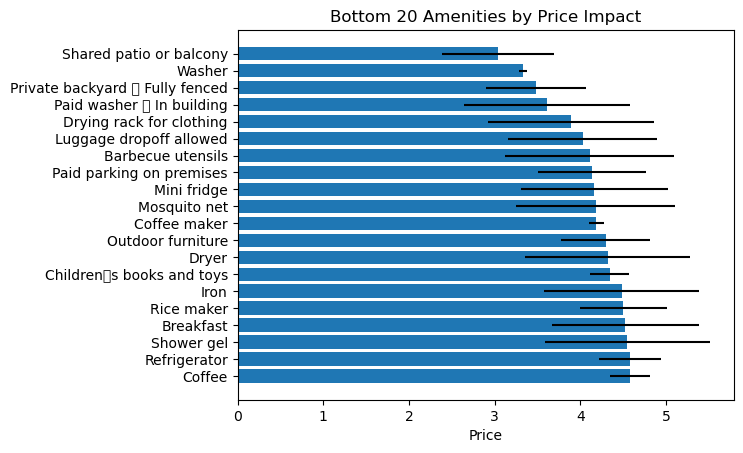

In [63]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
amenities = df.columns
y_pos = np.arange(len(amenities))
price = 3 + 10 * np.random.rand(len(amenities))
error = np.random.rand(len(amenities))

sorted_indices = np.argsort(price)
bottom_n = 20

bottom_price = price[sorted_indices[:bottom_n]]
bottom_amenities = amenities[sorted_indices[:bottom_n]]

ax.barh(y_pos[:bottom_n], bottom_price, xerr=error[sorted_indices[:bottom_n]], align='center')
ax.set_yticks(y_pos[:bottom_n])
ax.set_yticklabels(bottom_amenities)  # Use the bottom amenities as labels
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price')
ax.set_title('Bottom {} Amenities by Price Impact'.format(bottom_n))

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

XX = price_tbl._get_numeric_data()

# Drop columns with all-null values
XX = XX.dropna(axis=1, how='all')

# Check if XX is empty after dropping columns
if XX.empty:
    print("No numeric columns with valid data found.")
else:
    # Replace infinite and missing values with NaN
    XX.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with any NaN values
    XX = XX.dropna()

    vif_data = pd.DataFrame()
    vif_data["feature"] = XX.columns

    # Calculate VIF only if XX has more than one column
    if len(XX.columns) > 1:
        vif_data['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(len(XX.columns))]
        vif_data_sorted = vif_data.sort_values(['VIF'])
        print(vif_data_sorted)
    else:
        print("Insufficient columns for VIF calculation.")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

XX = superhost_df._get_numeric_data()

# Drop columns with all-null values
XX = XX.dropna(axis=1, how='all')

# Check if XX is empty after dropping columns
if XX.empty:
    print("No numeric columns with valid data found.")
else:
    # Replace infinite and missing values with NaN
    XX.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with any NaN values
    XX = XX.dropna()

    vif_data = pd.DataFrame()
    vif_data["feature"] = XX.columns

    # Calculate VIF only if XX has more than one column
    if len(XX.columns) > 1:
        vif_data['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(len(XX.columns))]
        vif_data_sorted = vif_data.sort_values(['VIF'])
        print(vif_data_sorted)
    else:
        print("Insufficient columns for VIF calculation.")